###  Население городов России

###  Темы

Среднее и медиана 
как типичное наблюдение выборки

Логнормальное распределение


In [1]:
import pandas as pd
import numpy as np

import matplotlib
import matplotlib.pyplot as plt

#  выбор темы картинок на Ваш вкус. Необязательная строчка.
#  matplotlib.style.use('ggplot')
#  Эта строчка нужна для того, чтобы картинки отображались в ячейках
%matplotlib inline


In [2]:
import seaborn as sns


In [3]:
#  from scipy.stats import norm
#  from sklearn.preprocessing import StandardScaler
#  from scipy import stats
#  import warnings
#  warnings.filterwarnings('ignore')


In [4]:

import os
# c:\aaa\temp_py\Shad_Python_01_2\
os.chdir("C:/Users/USER/Documents/Python/_AD_Python_part_1_Lectures/AD_Python_1_01/town_1959_2")

#   Население городов России в 1959 году
#   В тысячах человек
#   Город определяется по критериям 2000-го года

#   Импорт данных
# https://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_csv.html
# Полезные параметры:

#     sep -- задаёт символ-разделитель полей в файле (по умолчанию разделитель запятая);
#     names -- список названий колонок, если он не задан в файле;
#     index_col -- номер колонки с индексом.
#     decimal -- символ-разделитель для знаков после запятой.
#          decimal=b',',


town = pd.read_csv('town_1959_2.csv', encoding='cp1251', index_col=u'номер')
town.head()

,город,население
номер,,
1,Москва,5046.0
2,Санкт-Петербург,3003.0
3,Нижний_Новгород,941.0
4,Новосибирск,885.0
5,Самара,806.0


каково население типичного города россии в 1959 году?

типичный чек

определение типичного значения

In [5]:
print(town)

                 город  население
номер                            
1               Москва     5046.0
2      Санкт-Петербург     3003.0
3      Нижний_Новгород      941.0
4          Новосибирск      885.0
5               Самара      806.0
...                ...        ...
1 000      Усть-Илимск        0.5
1 001            Ясный        0.5
1 002           Мегион        0.4
1 003            Надым        0.3
1 004           Вуктыл        0.1

[1004 rows x 2 columns]


In [6]:
town.describe()

,население
count,1004.000000
mean,52.925199
std,204.885662
min,0.100000
25%,10.700000
50%,19.250000
75%,37.975000
max,5046.000000


In [7]:
#  Среднее значение равно 52.925199
#  Медиана равна  19.25
#  Что выбрать в качестве типичного значения?


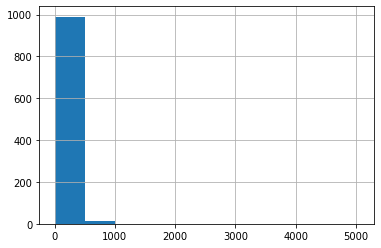

In [8]:
#  Гистограмма должна помочь. Она всегда помогает 
town[u'население'].hist()



In [12]:
#  Гистограмма всегда помогает, но в нашей задаче 
#  экстремальные значения слишком экстремальные 

#  Ничего не понятно: много городов с небольшим населением (меньше 500000)  
#  и мало городов с большим населением.

#  Может дело в выбросах?
#  Может выбросами являются Москва и Санкт-Петербург?
#  Повторим вычисления, исключив эти города.

town_2 = town.iloc[2:1004, 1]

town_2.describe()

count    1002.000000
mean       44.997904
std        91.645867
min         0.100000
25%        10.700000
50%        19.150000
75%        37.550000
max       941.000000
Name: население, dtype: float64

In [9]:
#  Среднее значение равно 44.997904
print("Среднее значение уменьшилось на",  (52.925199 - 44.997904)/52.925199*100)
print("Медиана уменьшилось с 19.25  до  19.15")
#  Что выбрать в качестве типичного значения?


Среднее значение уменьшилось на 14.978299845410126
Медиана уменьшилось с 19.25  до  19.15


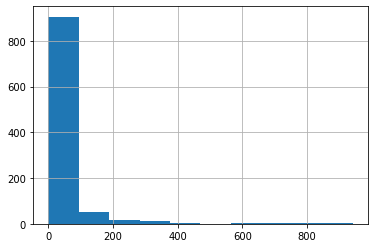

In [10]:
town_2[u'население'].hist()

#  Снова выбросы! Сколько можно!
#  Теперь будем удалять Нижний_Новгород,Новосибирск и Самару
#  Так выбросы будем удалять бесконечно.
#  Распределение похоже на логнормальное...


In [11]:
#  Какой процент наблюдений меньше среднего изначально?

len(town[town['население'] < 52.925199])/len(town)*100

82.37051792828686

In [12]:
#  Интересно, насколько стало лучше после отбрасывания выбросов.

len(town_2[town_2['население'] < 44.997904])/len(town_2)*100

78.84231536926147

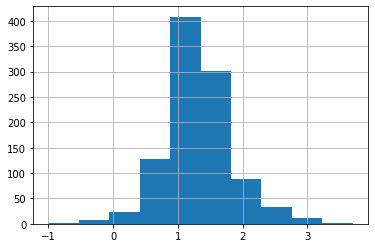

In [13]:
#  График не помог. Что делать?
#  Распределение похоже на логнормальное...

#  Гистограмма для логарифмов значений

x = np.log10(town[u'население'])
pd.Series(x).hist()

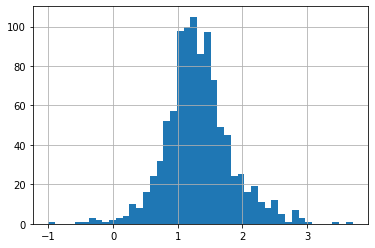

In [23]:
#  Повторим, увеличив число столбцов
pd.Series(x).hist(bins=45)

In [ ]:
#  где выбросы?
#  Сколько их?

#  Нижний Новгород уже не выброс!

#  Является ли распределение нормальным?
#  Об этом поговорим в теме "проверка статистических гипотез"

#  Можно ли говорить, 
#  что распределение несущественно отличается от нормального?



Сравнение гистограмм, ядерных оценок плотности и плотностей распределения


In [21]:
import scipy.stats as stats

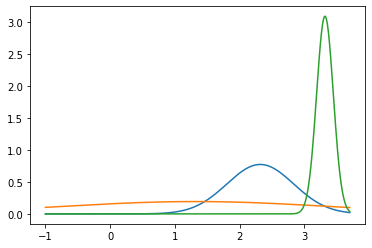

In [50]:
#  Построим три графика плотности нормального распределения, 
#  отличающиеся математическими ожиданиями и дисперсиями

#  Параметры распределения: 
#  математическое ожидание и стандартное отклонение
mu = np.mean(x)
sigma = np.std(x)

#  Решетка точек для построения графика функции
x_1 = np.linspace(np.min(x), np.max(x), 300)

#  собственно график
plt.plot(x_1, stats.norm.pdf(x_1, mu+1, sigma))

plt.plot(x_1, stats.norm.pdf(x_1, mu, 4*sigma))
plt.plot(x_1, stats.norm.pdf(x_1, mu+2, sigma/4))



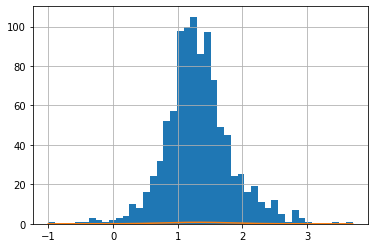

In [25]:
#  Типичная ошибка
#  Делаю ее за Вас

#  Построим гистограмму
#  Добавим график плотности распределения

pd.Series(x).hist(bins=45)
plt.plot(x_1, stats.norm.pdf(x_1, mu, sigma))


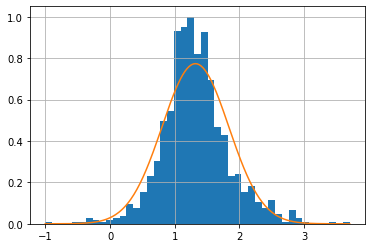

In [26]:
#  Построим гистограмму
#  Добавим график плотности распределения

#  Исправляем ошибку: забыли нормировать гистограмму

pd.Series(x).hist(bins=45, density=1)
plt.plot(x_1, stats.norm.pdf(x_1, mu, sigma))


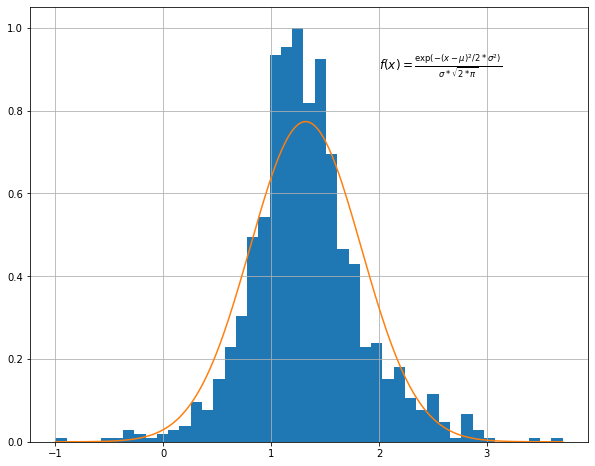

In [56]:
#  Построим гистограмму
#  Добавим график плотности распределения

#  Исправляем ошибку: забыли нормировать гистограмму

plt.figure(figsize=(10,8))
pd.Series(x).hist(bins=45, density=1)
plt.plot(x_1, stats.norm.pdf(x_1, mu, sigma))

#  Пример добавления подписей на графике
plt.text(2.0, 0.9, r'$f(x) = \frac{\exp(-(x-\mu)^2/2*\sigma^2)}{\sigma*\sqrt{2*\pi}}$',
        fontsize=12)

#  plt.savefig("KDE_pres_05.png")

Вопрос: Перечислите отклонения от нормальности

Еще раз проиллюстрируем отличие плотности распределения
от ядерной оценки плотности.

Используем библиотеку seaborn

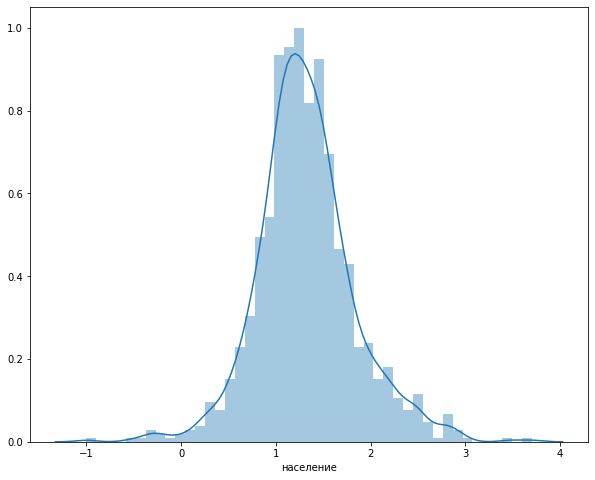

In [57]:
#  Пример наложения ядерной оценки плотности на гистограмму
plt.figure(figsize=(10,8))

sns.distplot(x, bins=45)

plt.savefig("KDE_pres_06.png")

Добавление

Стоит ли использовать rug plot.
Очень редко, черточки сливаются...

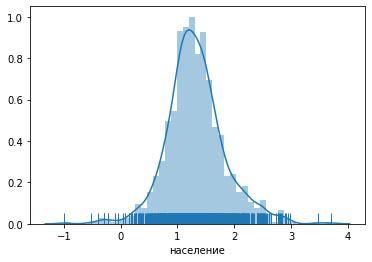

In [52]:
sns.distplot(x, bins=45, rug=True)

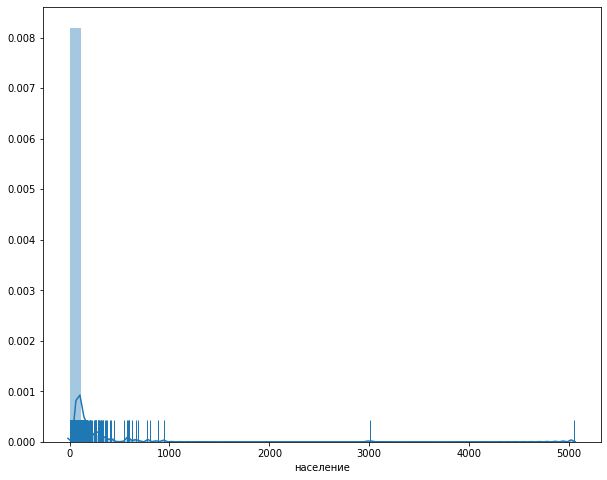

In [53]:
Оправданное применение rug plot
Видно расположение экстремальных значений

plt.figure(figsize=(10,8))
sns.distplot(town[u'население'], bins=45, rug=True)

Терминология 

Гистограмма, ядерных оценок плотности и плотность распределения - 
все они плотности

Но первые две - эмпирические оценки плотности

Эмпирические - построенные по данным


Рабочие материалы, в курсе не используются

In [17]:
#  Замечание
#  Команда sns.distplot устарела

#  Вместо нее рекомендуют применять sns.displot(x)

#  Однако и sns.displot(x) не идеальна

sns.displot(x)

AttributeError: module 'seaborn' has no attribute 'displot'

In [17]:
zzz = [1.0, 2.0, 1.4, 2.0, 1.2, 1.5, ]